In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,Imputer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [4]:
m=pd.read_csv('C:/Users/hp/Downloads/Github/Repository/mushrooms.csv')
ms=pd.DataFrame(m)

In [5]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
ms.shape

(8124, 23)

In [8]:
le=LabelEncoder()
for i in ms.columns:
    ms[i]=le.fit_transform(ms[i].astype(str))

In [9]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
ms.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [11]:
for col in ms.columns:
    if ms.skew().loc[col]>0.55:
        ms[col]=np.log1p(ms[col])

In [12]:
ms.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                  -0.365280
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.129453
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 1.481287
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.342186
dtype: float64

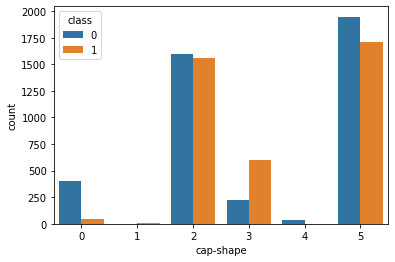

In [13]:
sns.countplot(x='cap-shape',hue='class',data=ms)

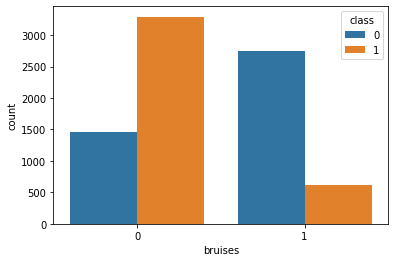

In [14]:
sns.countplot(x='bruises',hue='class',data=ms)

In [15]:
ms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,1.597865,0.415559,4.144756,0.974151,0.111941,0.214326,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,0.720021,2.291974,3.596750,3.644018,0.699397
std,0.499708,1.604329,1.229873,0.475750,0.492848,2.103729,0.158695,0.255086,0.320369,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.116406,1.801672,2.382663,1.252082,0.655960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.386294,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,0.693147,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,1.609438,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,0.693147,2.000000,3.000000,4.000000,0.693147
75%,1.000000,5.000000,3.000000,2.197225,1.000000,5.000000,1.000000,0.000000,0.693147,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,0.693147,4.000000,7.000000,4.000000,1.098612
max,1.000000,5.000000,3.000000,2.302585,1.000000,8.000000,1.000000,0.693147,0.693147,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,1.098612,4.000000,8.000000,5.000000,1.945910


In [16]:
df_x=ms.drop('class',axis=1)
y=ms['class']

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
def random(alg,x,y):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [19]:
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    score=ml.score(x_train,y_train)
    print(score)
    pred=ml.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [20]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false_Positive_rate')
    plt.ylabel('True positive rate')
    plt.title(alg)
    plt.show()
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_auc_score=',roc_score)

In [21]:
def cross_val(alg):
    cvscore=cross_val_score(alg,x,y,cv=5)
    print(cvscore)
    print(cvscore.mean())
    print(cvscore.std())

In [22]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
lr=LogisticRegression()
random(lr,x,y)

0.9571055576277508 at 84


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=84)
model(lr)

0.9467205585155245
0.9571055576277508
[[1333   50]
 [  65 1233]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1383
           1       0.96      0.95      0.96      1298

    accuracy                           0.96      2681
   macro avg       0.96      0.96      0.96      2681
weighted avg       0.96      0.96      0.96      2681



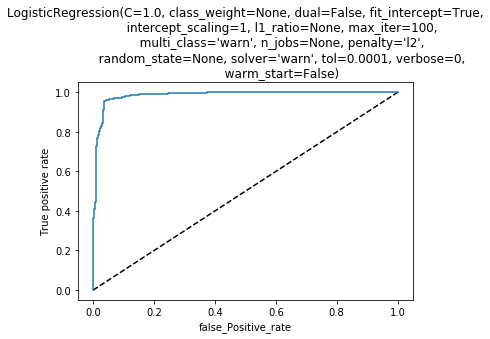

roc_auc_score= 0.9568848342240747


In [24]:
from sklearn.metrics import roc_auc_score,roc_curve
roc(lr)

In [25]:
cross_val(lr)

[0.66113161 0.98153846 0.87569231 0.99815271 0.51970443]
0.807243904680805
0.18737006051638225


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc,x,y)

1.0 at 43


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)
model(dtc)

1.0
1.0
[[1353    0]
 [   0 1328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



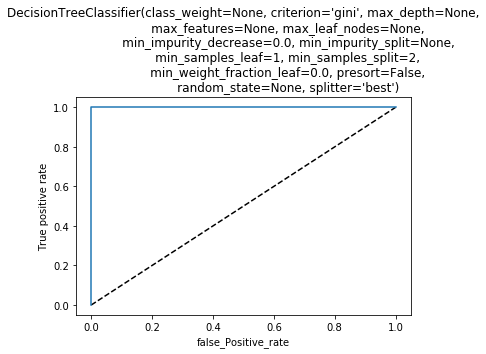

roc_auc_score= 1.0


In [28]:
roc(dtc)

we get the score of 1.0 from Decision Tree Classifier Algorithm.So,it is perfect algorithm to select

In [29]:
from sklearn.externals import joblib
joblib.dump(dtc,'mushroom2.pkl')

['mushroom2.pkl']